In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pa=pd.read_csv(r'F:\carreer\Property_Price_Train.csv')

In [3]:
pa.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pa.isnull().sum()

Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 81, dtype: int64

In [5]:
pa.columns[pa.isnull().sum() *100/ pa.shape[0] > 80] # to Know which cols have null values more than 80 percent

Index(['Lane_Type', 'Pool_Quality', 'Fence_Quality', 'Miscellaneous_Feature'], dtype='object')

# EDA AND DATA PREPROCESSING

In [6]:
# DATA CLEANING

pa.Lot_Extent.fillna(pa.Lot_Extent.mean(), inplace=True)
pa.Brick_Veneer_Type.fillna('None', inplace=True)
pa.Brick_Veneer_Area.fillna(pa.Brick_Veneer_Area.mean(), inplace=True)
pa.Basement_Height.fillna('TA', inplace=True)
pa.Basement_Condition.fillna('TA', inplace=True)
pa.Exposure_Level.fillna('No', inplace=True)
pa.BsmtFinType1.fillna('Unf', inplace=True)
pa.BsmtFinType2.fillna('Unf', inplace=True)
pa.Electrical_System.fillna('SBrkr', inplace=True)
pa.Fireplace_Quality.fillna('Gd', inplace=True)
pa.Garage.fillna('Attchd', inplace=True)
pa.Garage_Built_Year.fillna(1978.0,inplace=True)
pa.Garage_Finish_Year.fillna('Unf',inplace=True)
pa.Garage_Quality.fillna('TA', inplace=True)
pa.Garage_Condition.fillna('TA', inplace=True)



In [7]:
pa=pa.drop(['Id','Lane_Type', 'Pool_Quality', 'Fence_Quality', 'Miscellaneous_Feature'],axis=1)

In [8]:
pa.isnull().sum()[pa.isnull().sum()<0]

Series([], dtype: int64)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
pa[pa.select_dtypes(include=['object']).columns]= pa[pa.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [12]:
pa.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,...,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,21.788818,0,0,0,0,12,2008,8,4,250000


In [13]:
pa.shape

(1459, 76)

In [40]:
pa = df1 #rerun the model

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
pa_train,pa_test=train_test_split(pa, test_size=.2)


In [43]:
pa_train.shape

(1116, 76)

In [44]:
pa_test.shape

(280, 76)

In [45]:
pa_train_x=pa_train.iloc[:,:-1]
pa_train_y=pa_train.iloc[:,-1]

In [46]:
pa_test_x=pa_test.iloc[:,:-1]
pa_test_y=pa_test.iloc[:,-1]

In [47]:
pa_train_x.shape

(1116, 75)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
linreg_pa = LinearRegression()

In [50]:
linreg_pa.fit(pa_train_x , pa_train_y)

LinearRegression()

In [51]:
Rsquare = linreg_pa.score(pa_train_x , pa_train_y)
Rsquare

0.8557431195034407

In [52]:
N = pa_train_x.shape[0]
K = pa_train_x.shape[1]

In [53]:
AdjRsquare = 1 - (1 - Rsquare) * (N - 1)/( N - K - 1)
AdjRsquare

0.8453399790830158

In [54]:
pred_train_pa = linreg_pa.predict(pa_train_x)
pred_test_pa = linreg_pa.predict(pa_test_x)

In [55]:
err_train = pa_train_y - pred_train_pa
err_test = pa_test_y - pred_test_pa

In [56]:
#lets check assumptions
np.mean(err_train)

-3.665622230285385e-10

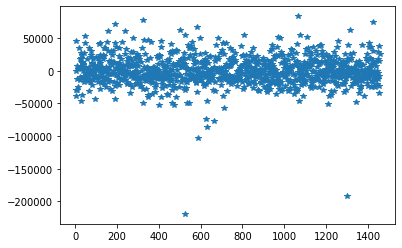

In [57]:
plt.plot(err_train , "*")

C:\Users\Shyam Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sale_Price'>

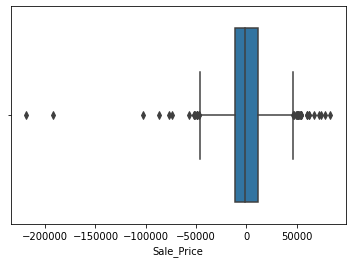

In [58]:
sns.boxplot(err_train)

(array([  2.,   0.,   0.,   1.,   3.,  23., 357., 591., 127.,  12.]),
 array([-219105.08151599, -188867.27279616, -158629.46407634,
        -128391.65535652,  -98153.84663669,  -67916.03791687,
         -37678.22919705,   -7440.42047722,   22797.3882426 ,
          53035.19696242,   83273.00568225]),
 <BarContainer object of 10 artists>)

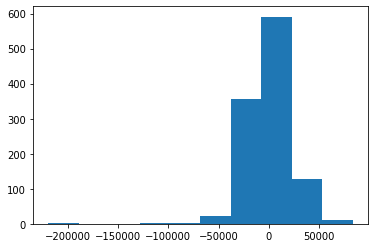

In [59]:
plt.hist(err_train)

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,
         22.,  83., 274., 381., 210.,  92.,  35.,   8.,   4.]),
 array([-219105.08151599, -203986.17715607, -188867.27279616,
        -173748.36843625, -158629.46407634, -143510.55971643,
        -128391.65535652, -113272.7509966 ,  -98153.84663669,
         -83034.94227678,  -67916.03791687,  -52797.13355696,
         -37678.22919705,  -22559.32483713,   -7440.42047722,
           7678.48388269,   22797.3882426 ,   37916.29260251,
          53035.19696242,   68154.10132234,   83273.00568225]),
 <BarContainer object of 20 artists>)

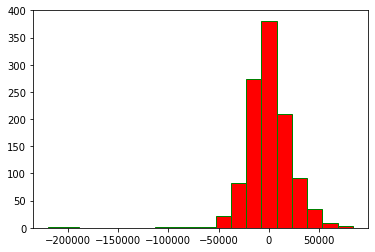

In [60]:
plt.hist(err_train , color = "r" , bins = 20 , edgecolor = "g")

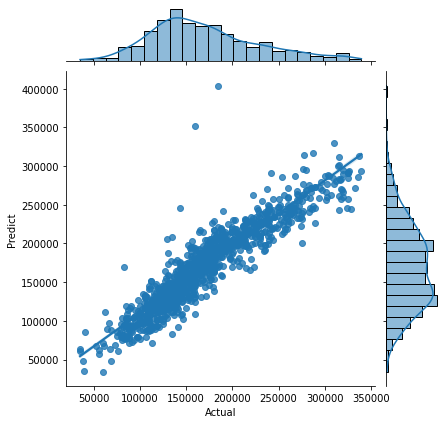

In [61]:
pred_actual_df = pd.DataFrame()
pred_actual_df['Actual'] = pa_train_y
pred_actual_df['Predict'] = pred_train_pa
sns.jointplot(x = 'Actual' , y = 'Predict',data = pred_actual_df, kind= 'reg')

In [36]:
# here some are far away from regression line so they outlier
# if outlier are their then lets try to remove the outlier 
# normally take 2SD (standard deviation) i.e 95% data covered here

# Code to remove the outlier 

In [37]:
def remove_outlier(df,col,k=2):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    # df1 is A final dataframe (DF) where the outlier has been removed 
    print("Number of outlier removed ==>" , df.shape[0] - df1.shape[0])

# Important

In [38]:
remove_outlier(pa,'Sale_Price', k=2)
#here if k will increase outlier will decrease and 
#if k will decrease outlier will increase k is nothing but standard deviation it is 2 basically
# remember  always the remove the outlier from entire data

(1396, 76)
Number of outlier removed ==> 63


# Note after removing outlier  

In [39]:
# After removing the outlier rerun the model again
# just before the sampling add the one line i.e df = df1 where df is our data so it can be anyname according to our data
# and df1 is data after removing the outlier from our data which was done by the remove_outleir code 
# please dont rerun the data model more because you get the model accuracy you will loose large ammount data